<a href="https://colab.research.google.com/github/Lohit-4267/Banking_/blob/main/End_To_End.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Banking.csv')
df.head(4)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [5]:
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [6]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

<Axes: xlabel='Income Band'>

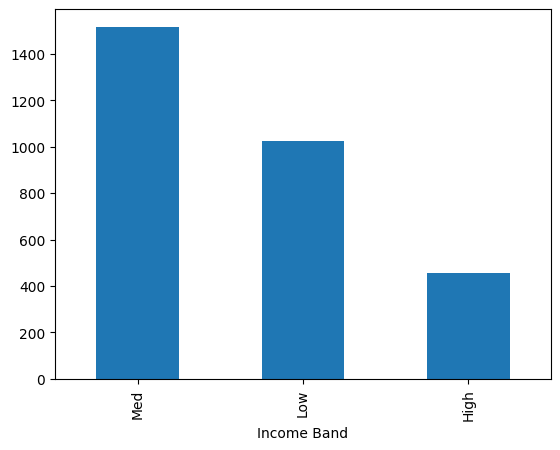

In [7]:
df['Income Band'].value_counts().plot(kind='bar')

In [8]:
# Examine the distribution of unique cataegories in categorical columns
categorical_cols = df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns

for col in categorical_cols:
  print(f"Value Counts for '{col}':")
  display(df[col].value_counts())

Value Counts for 'BRId':


,count
BRId,
3,1352
1,660
2,495
4,493


Value Counts for 'GenderId':


,count
GenderId,
2,1512
1,1488


Value Counts for 'IAId':


,count
IAId,
1,177
2,177
3,177
4,177
8,177
9,176
13,176
12,176
10,176


Value Counts for 'Amount of Credit Cards':


,count
Amount of Credit Cards,
1,1922
2,765
3,313


Value Counts for 'Nationality':


,count
Nationality,
European,1309
Asian,754
American,507
Australian,254
African,176


Value Counts for 'Occupation':


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6


Value Counts for 'Fee Structure':


,count
Fee Structure,
High,1476
Mid,962
Low,562


Value Counts for 'Loyalty Classification':


,count
Loyalty Classification,
Jade,1331
Silver,767
Gold,585
Platinum,317


Value Counts for 'Properties Owned':


,count
Properties Owned,
2,777
1,776
3,742
0,705


Value Counts for 'Risk Weighting':


,count
Risk Weighting,
2,1222
1,836
3,460
4,322
5,160


Value Counts for 'Income Band':


,count
Income Band,
Med,1517
Low,1027
High,456


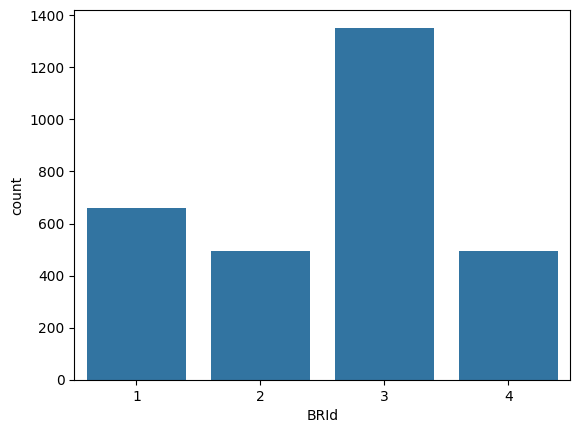

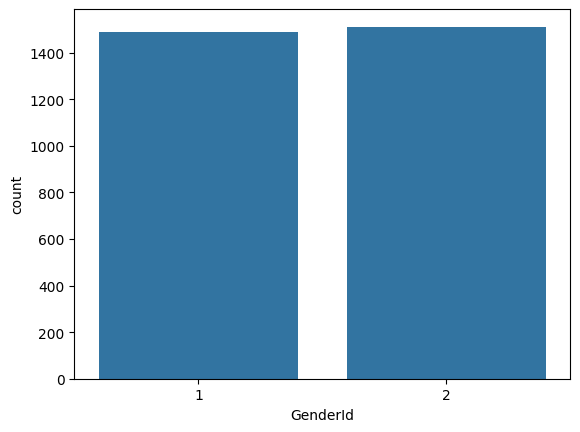

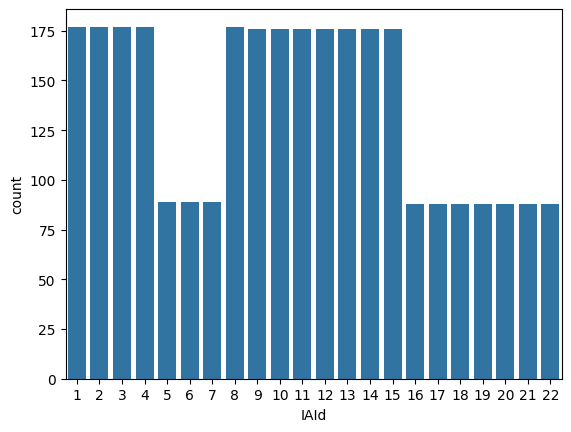

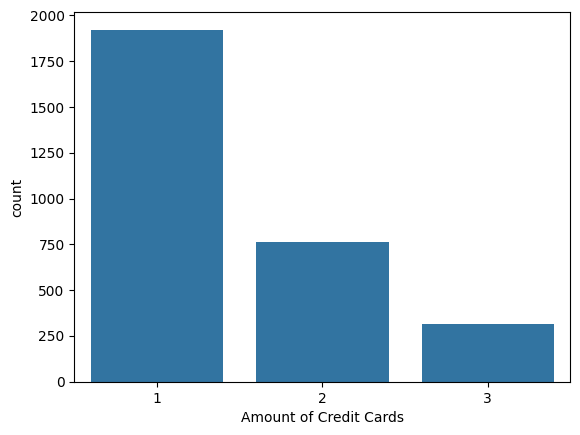

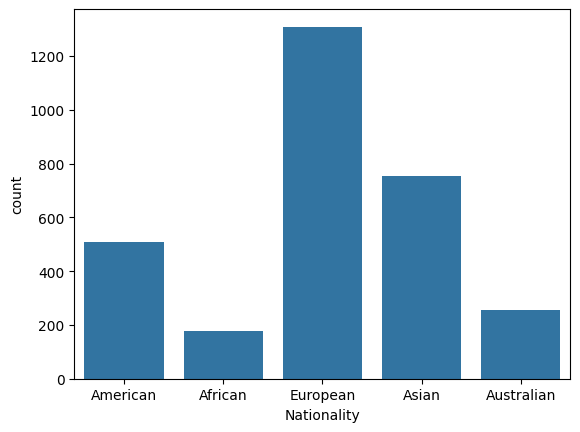

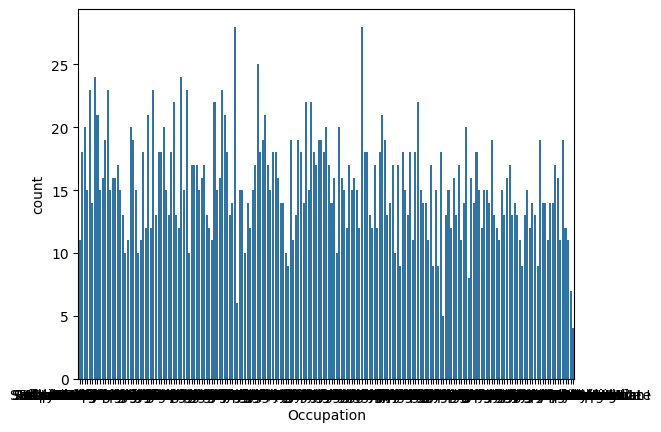

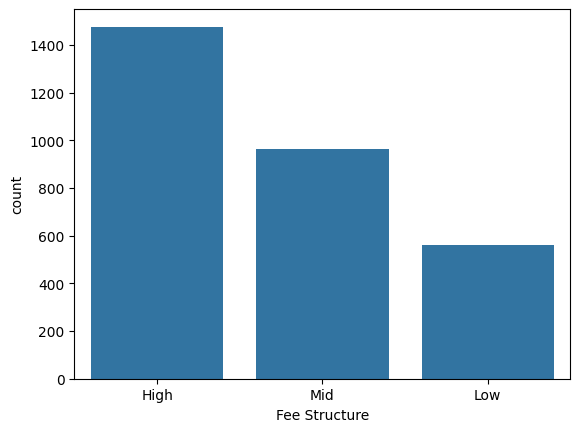

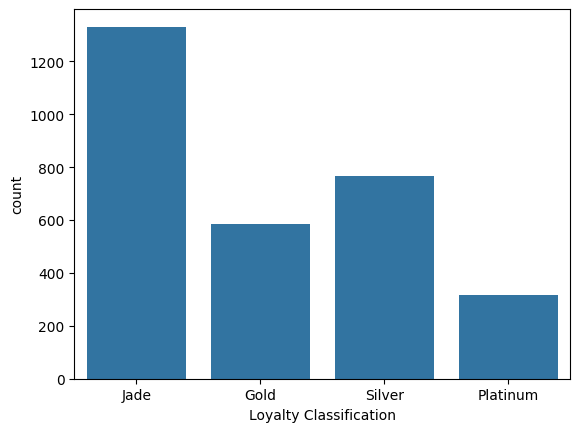

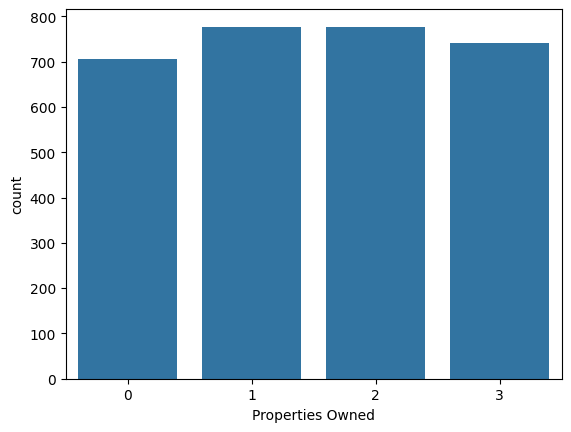

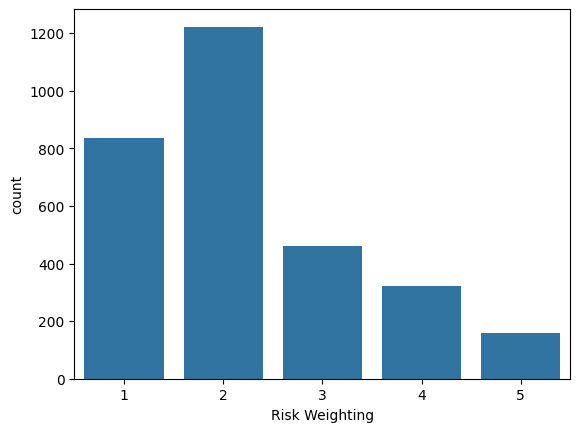

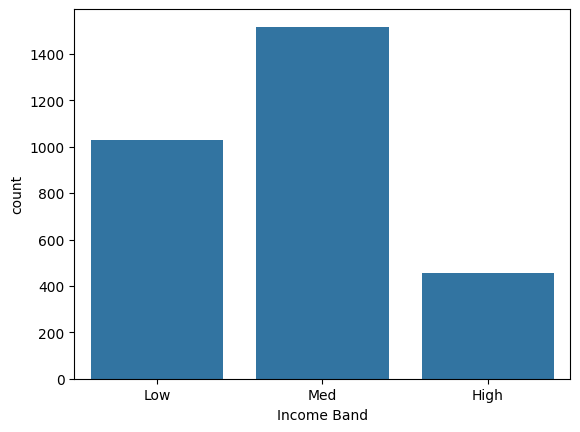

In [9]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

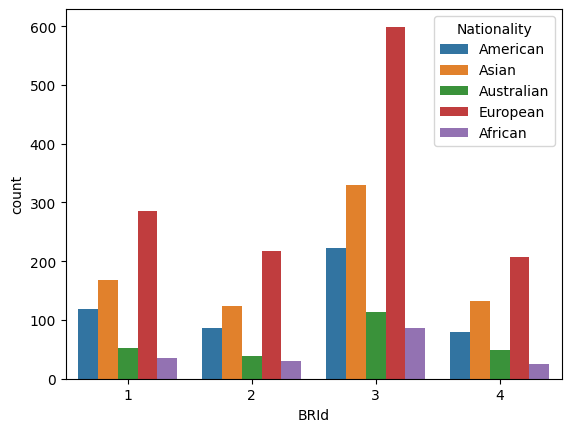

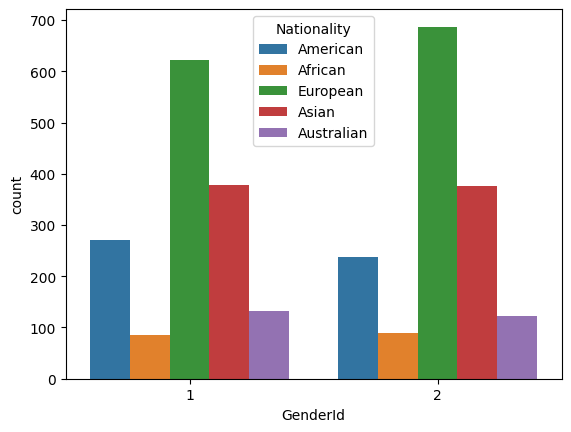

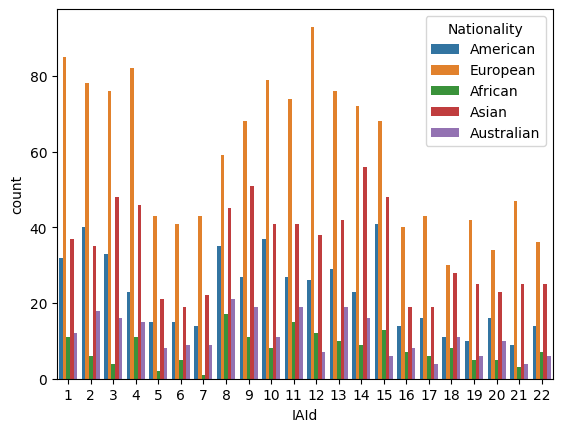

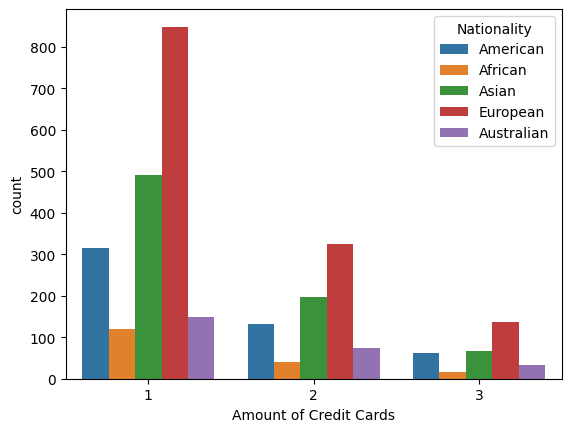

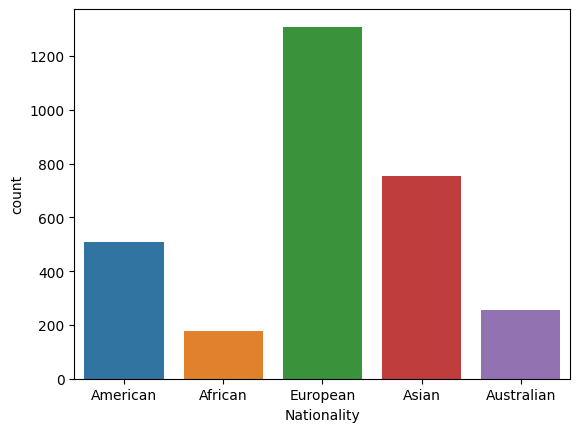

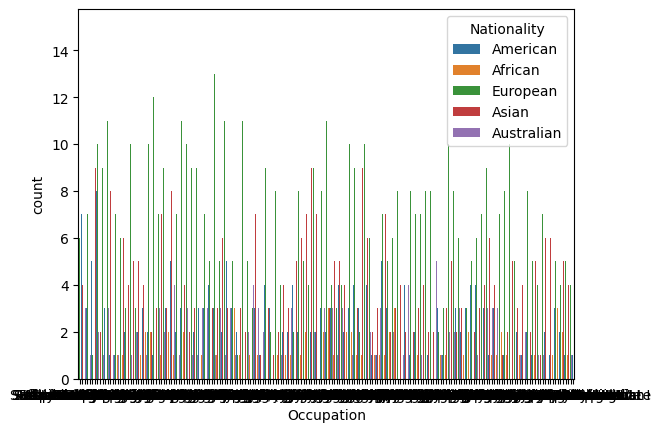

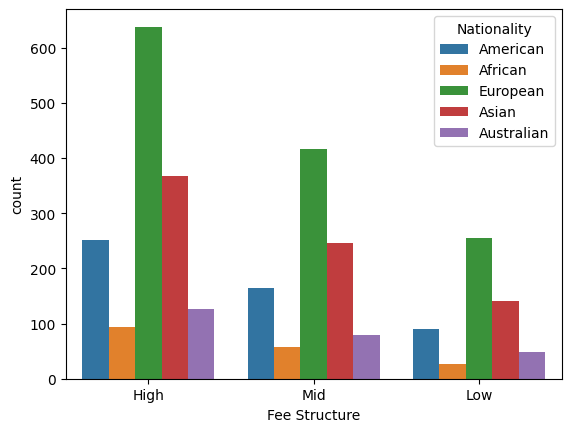

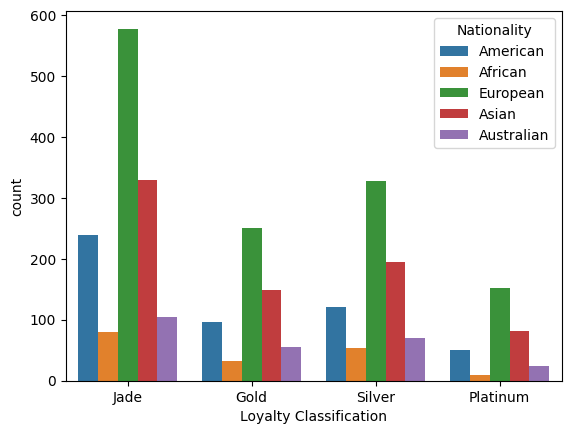

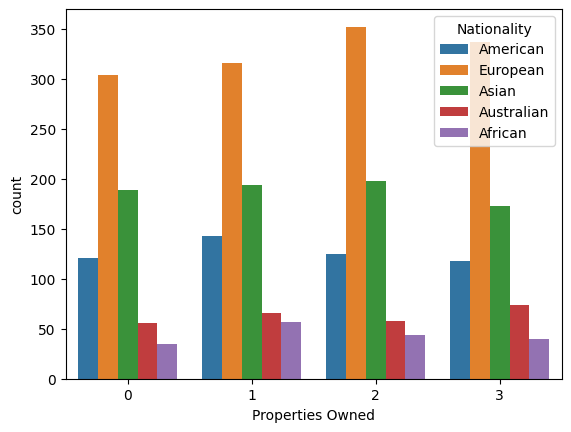

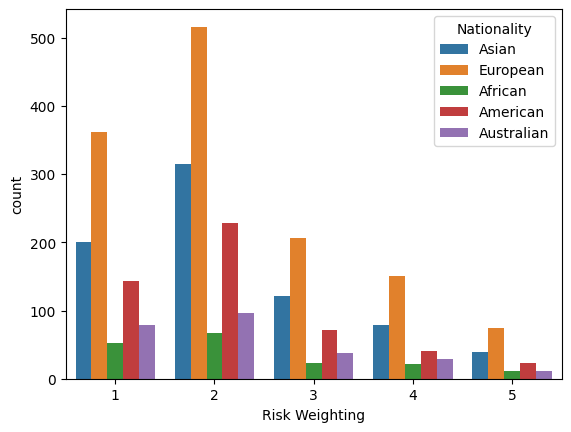

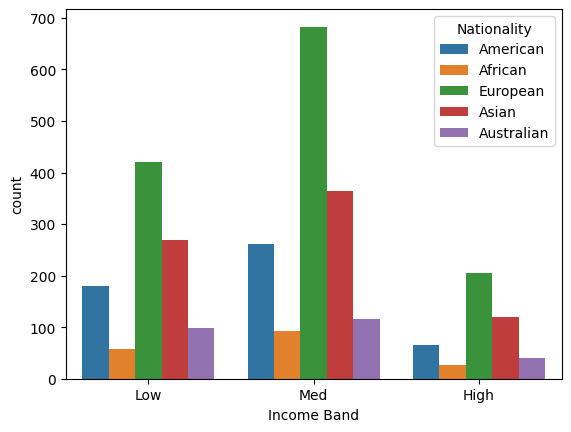

In [10]:
for i, predictor in enumerate(df[["BRId", "GenderId", "IAId", "Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

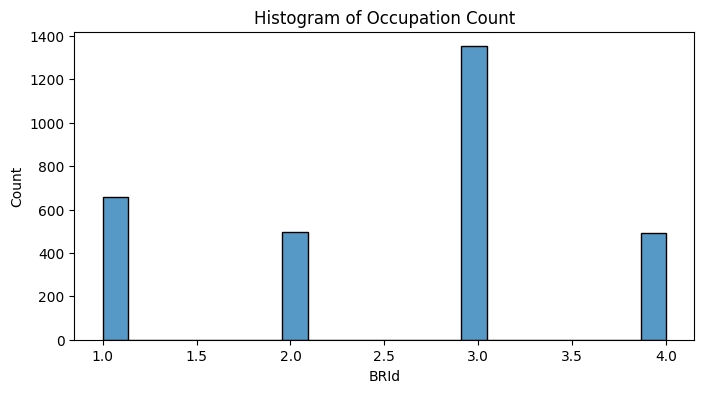

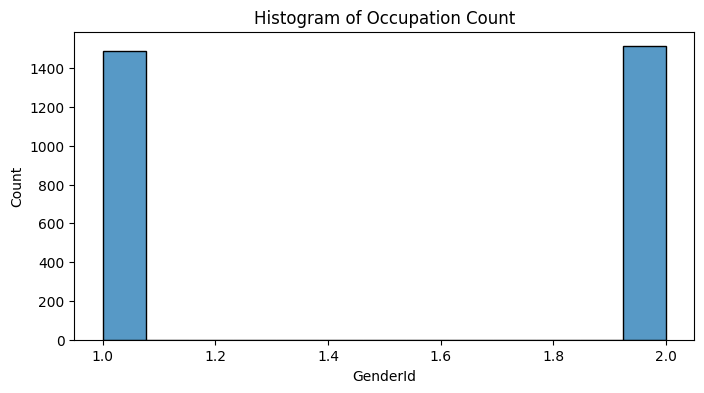

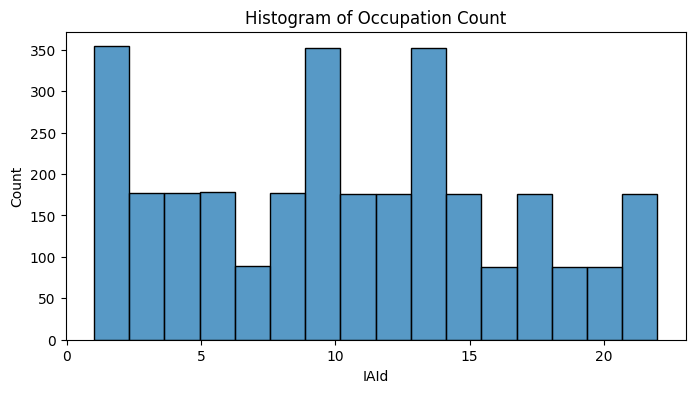

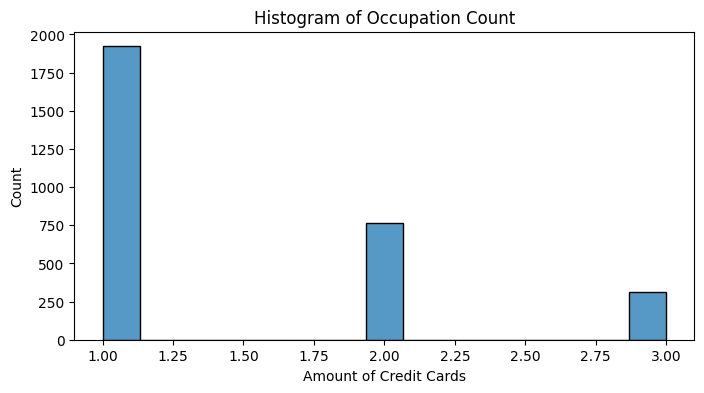

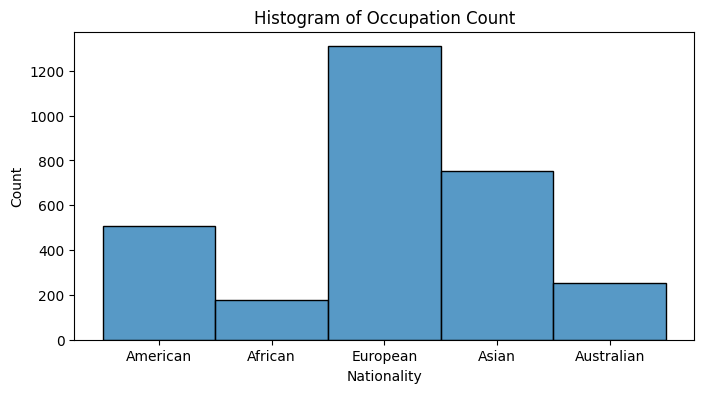

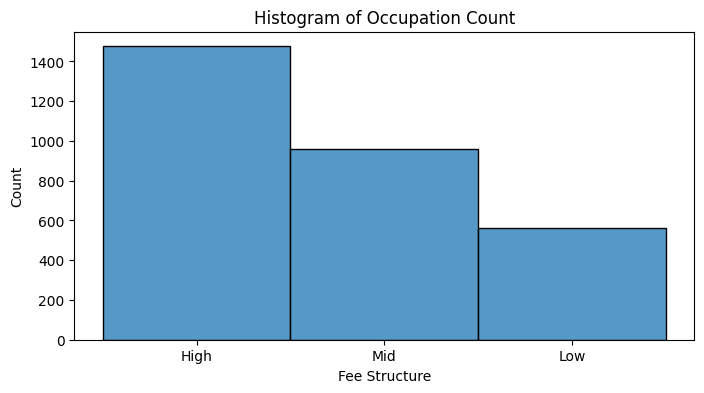

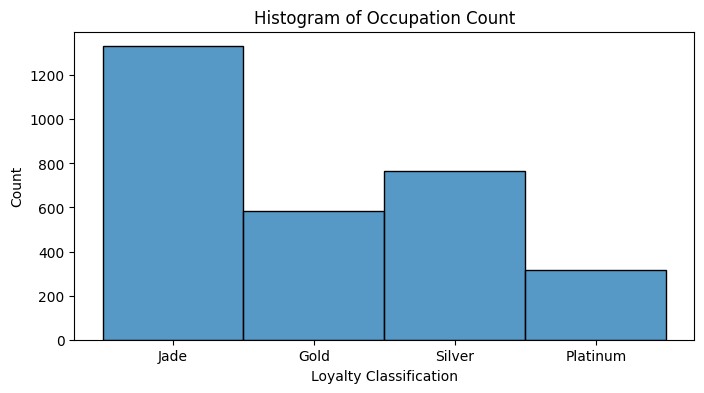

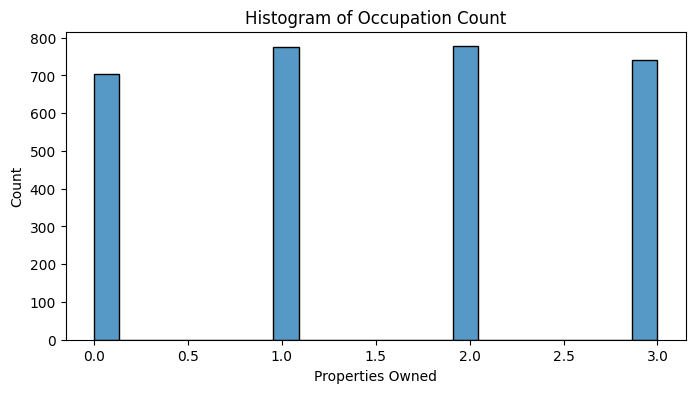

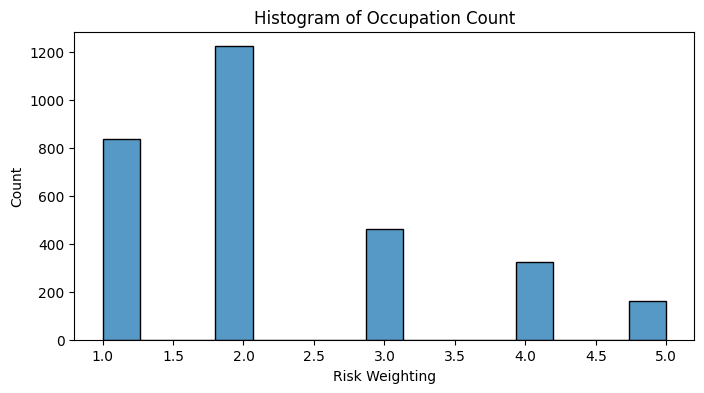

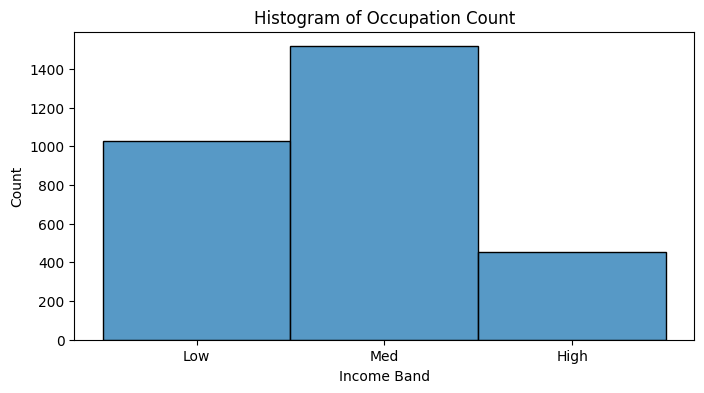

In [11]:
# HIstplot of value counts for different Occupation

for col in categorical_cols:
  if col == "Occupation":
    continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of Occupation Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

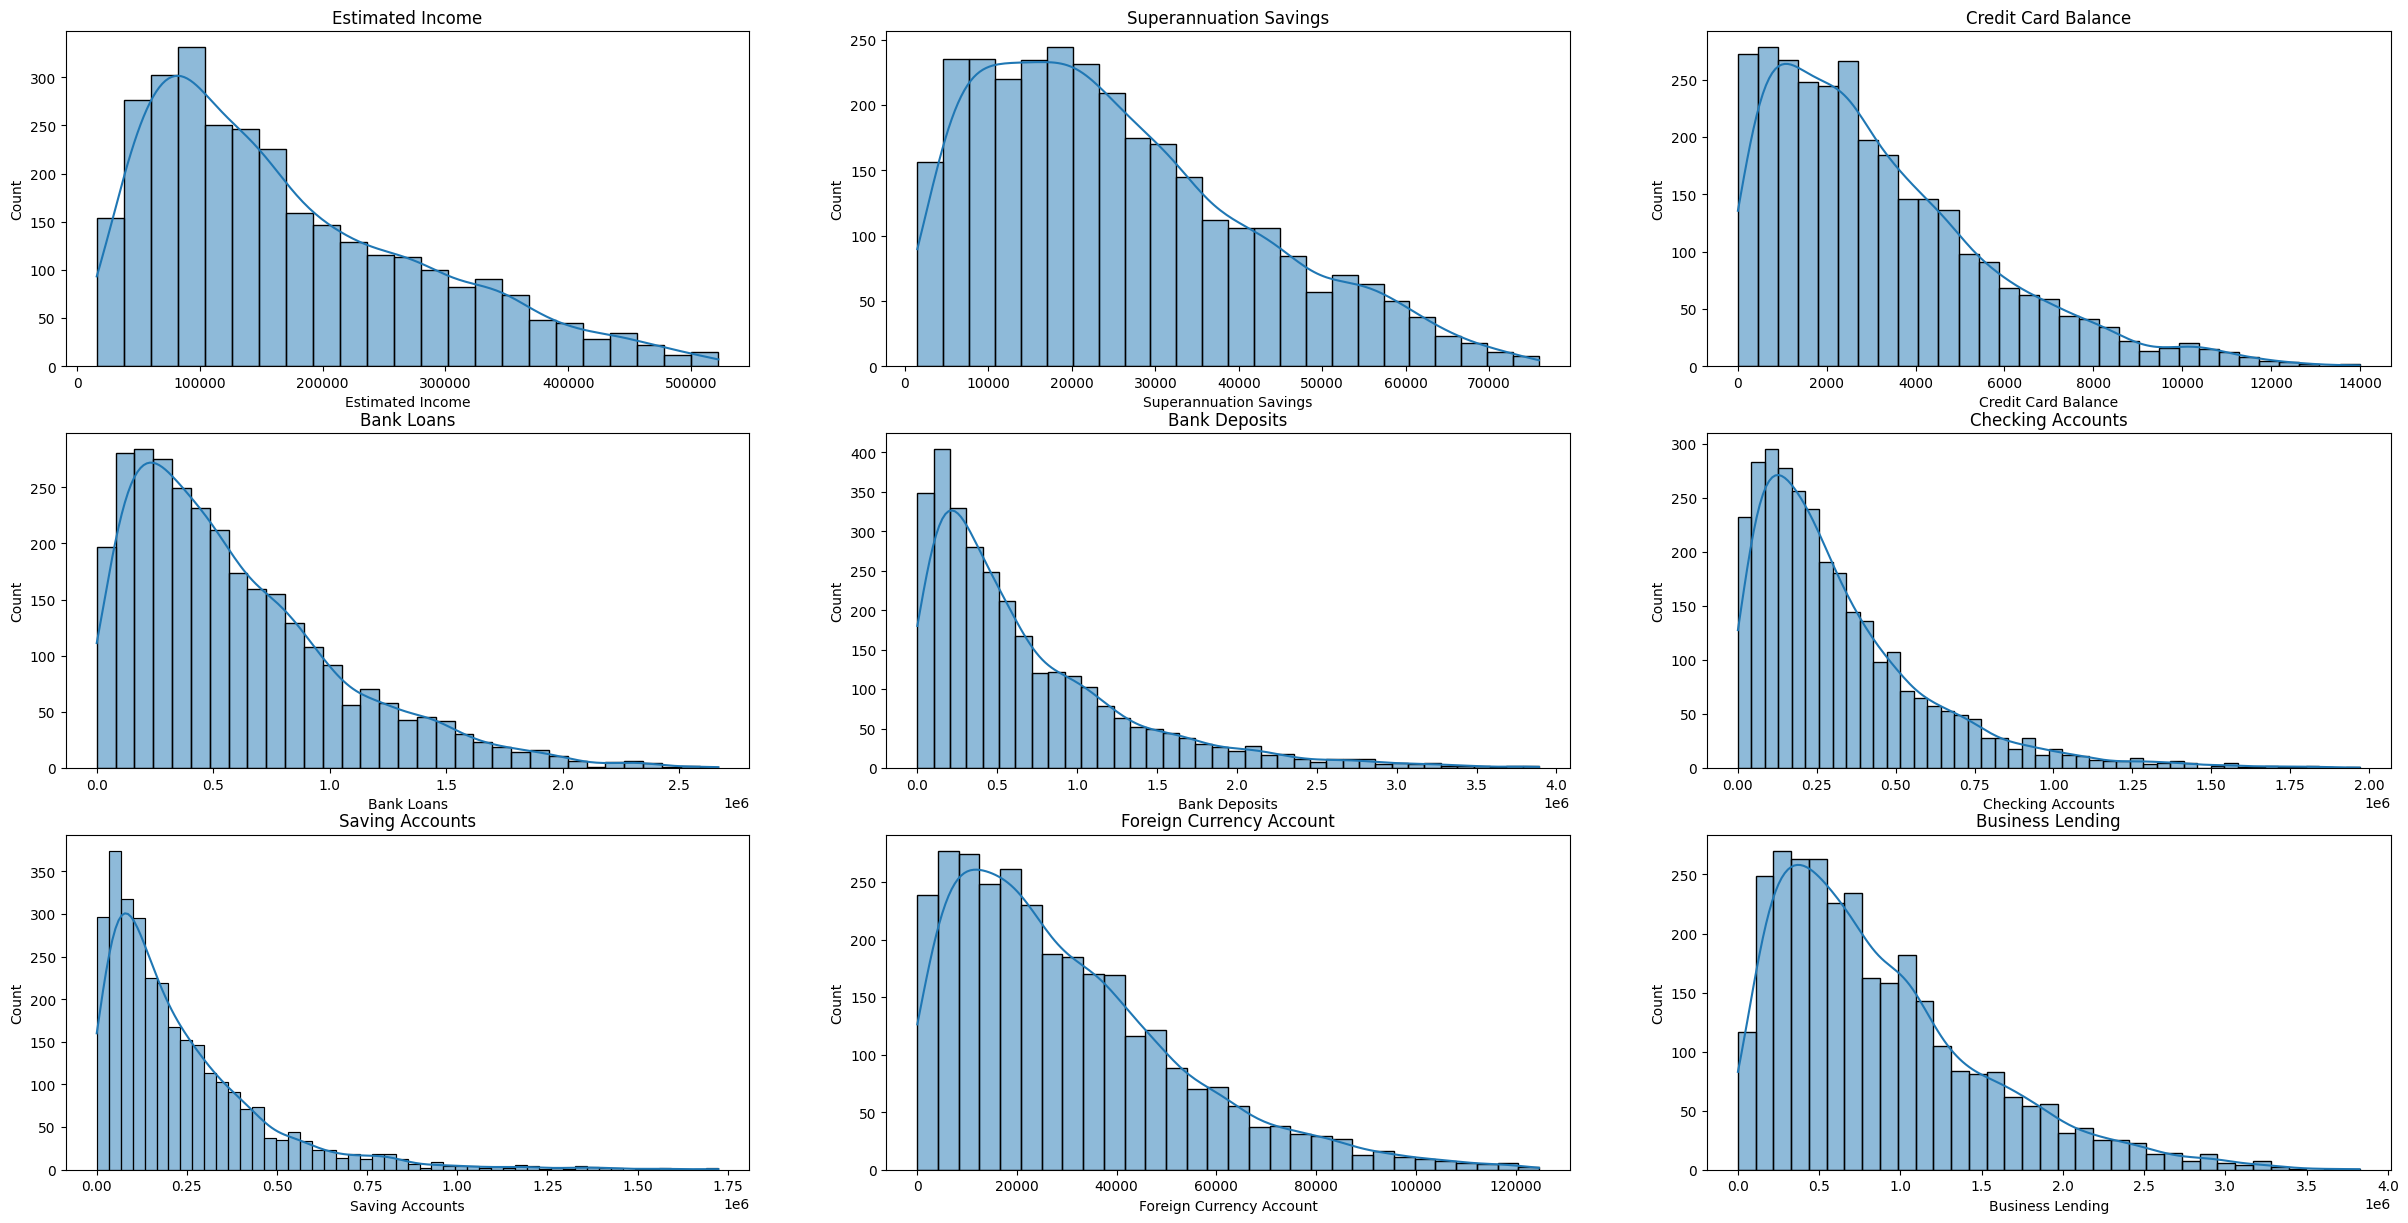

In [12]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(30,20))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.show()

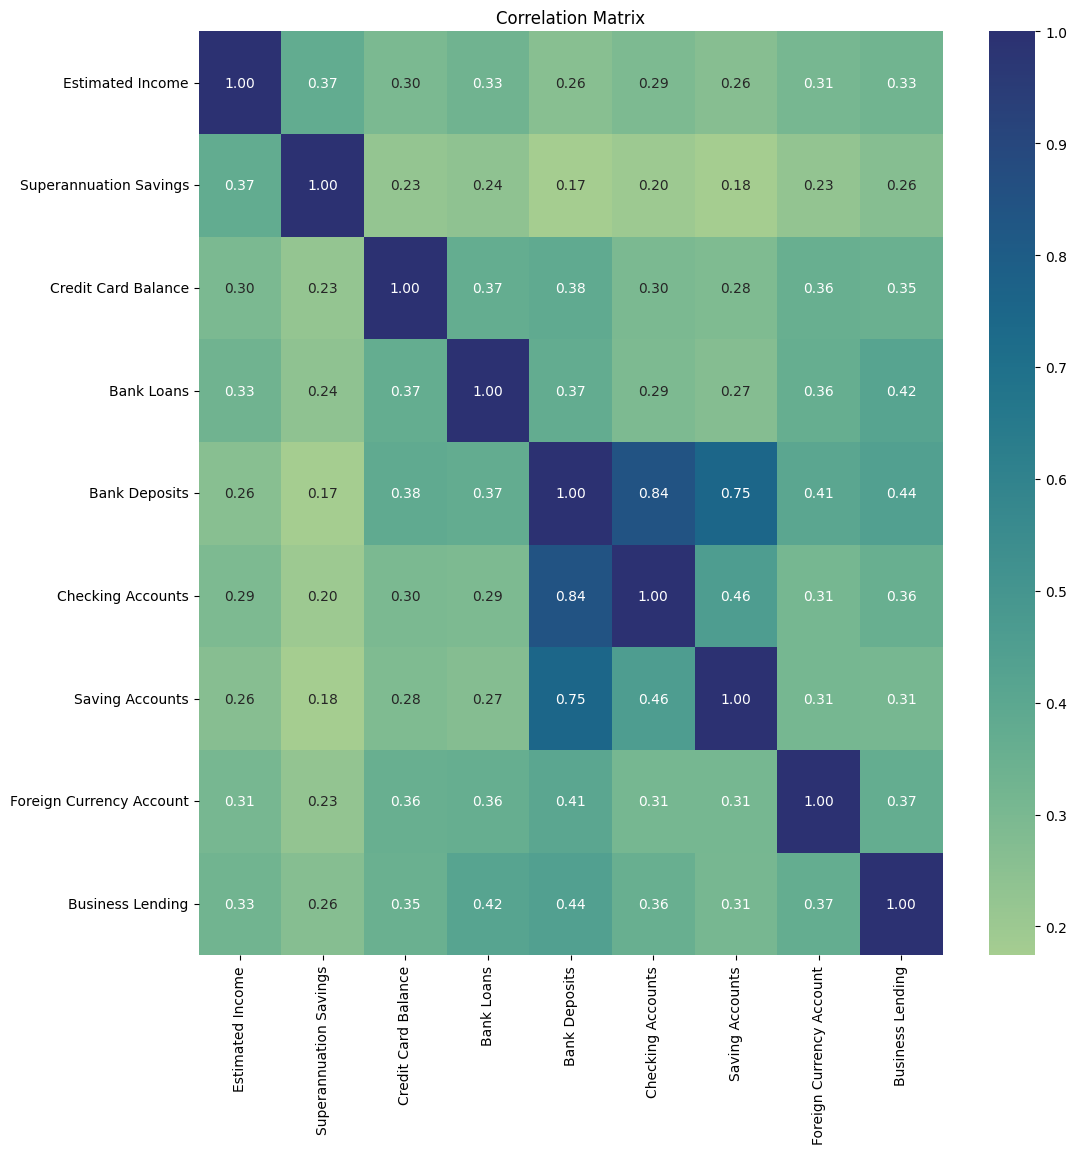

In [13]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Insights of EDA:
The strongest positive correlation occur among "Bank Deposits" with "Checking Accounts", "Saving Accounts" and "Foreign Currency Account" indicating that customers who maintain high balances in one account type often hold substantial amount/funds across other accounts as well.